In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [23]:
#One hot encoding the target classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [22]:
#Creating 3 Important Lists --
#1.data list for storing image data in numpy array form
#2.paths list for storing paths of all images
#3.result list for storing one hot encoded form of target class whether normal or tumor

In [7]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk('C:/Users/HP/Downloads/brain_tumor_dataset/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [8]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk("C:/Users/HP/Downloads/brain_tumor_dataset/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [9]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [11]:
result=np.array(result)
result=result.reshape(139,2)
result

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [24]:
# Splitting the Data into Training & Testing

In [12]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#Model  Building

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [14]:
y_train.shape

(111, 2)

In [15]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 15s 3s/step - loss: 56.8144 - val_loss: 25.0796
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 23.5474 - val_loss: 8.7999
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 7.0332 - val_loss: 61.5200
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 7.5110 - val_loss: 65.5438
Epoch 5/30
3/3 [==============================] - 7s 3s/step - loss: 6.3776 - val_loss: 28.0092
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 4.4937 - val_loss: 11.4738
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 3.0534 - val_loss: 17.7269
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 1.6776 - val_loss: 26.3871
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 1.6911 - val_loss: 28.5172
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 2.0640 - val_loss: 23.3613
Epoch 11/30
3/3 [====================

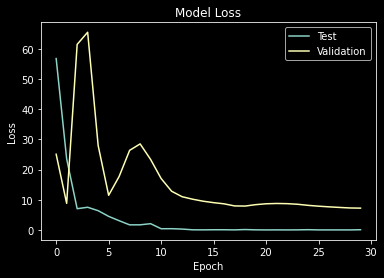

In [16]:
#Plotting Losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [25]:
#Just Checking the Model

In [17]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


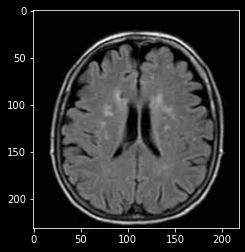

In [18]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/HP/Downloads/brain_tumor_dataset/brain_tumor_dataset/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


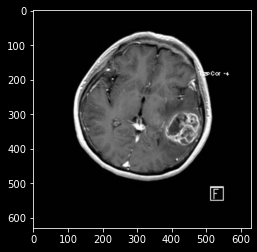

In [20]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/HP/Downloads/brain_tumor_dataset/brain_tumor_dataset/yes/Y29.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))